 !![Brt408s6QtJ1gV8y41HJKIxIcqSNDig_nm_leO-Al1dcNMRYi1mVT1kqNxhcvF6nly8z6mSkZ0XU1cujEMPrb2RrGXUkj7HcodJL7C9rk_g.jpeg](attachment:8c39bc2c-372e-41c2-ae26-5dbc60831cc2.jpeg)

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Explanation:

	•	tensorflow: Deep learning engine
	•	numpy: For numerical data
	•	matplotlib: For visual output


In [24]:
x = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([2, 4, 6, 8, 10], dtype=float)

Explanation:

	•	x = input
	•	y = expected output
	•	Relationship: y = 2x


# Step 3: Build Neural Network Model

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

Explanation:

	•	Sequential: Model with layers in sequence
	•	Dense: Fully connected layer
	•	units=1: One neuron
	•	input_shape=[1]: One input value
This neuron learns :

output = weight × input + bias

Step 4: Compile the Model

In [26]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Explanation:

	•	optimizer: How model improves (SGD = Gradient Descent)
	•	loss: How wrong the prediction is


In [27]:
history = model.fit(x, y, epochs=200, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


Explanation:

	•	epochs: Number of times model sees data
	•	history: Stores loss values

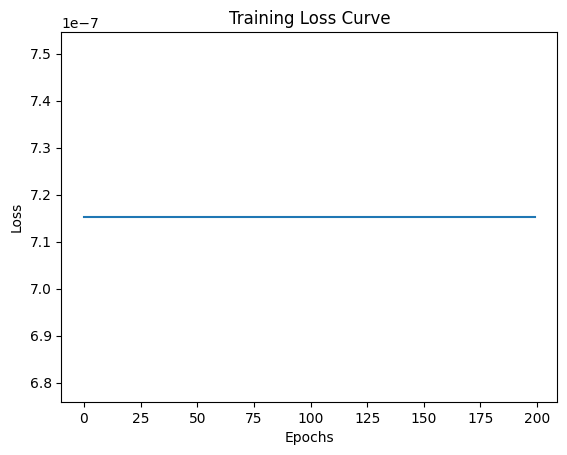

In [28]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

In [29]:
history.history.keys()


dict_keys(['accuracy', 'loss'])

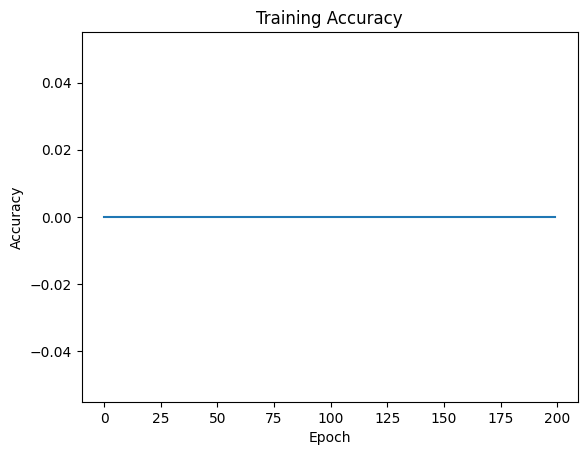

In [30]:
plt.plot(history.history['accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.show()


In [31]:
import numpy as np

print(model.predict(np.array([[10]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[3.1016004]]


# PyTorch

In [32]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [33]:
x = torch.tensor([[1.0],[2.0],[3.0],[4.0],[5.0]])
y = torch.tensor([[2.0],[4.0],[6.0],[8.0],[10.0]])

In [34]:
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        return self.linear(x)

model = SimpleModel()

Explanation:

	•	nn.Module: Base class for models
	•	Linear(1,1): One neuron

In [35]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [36]:
losses = []

for epoch in range(200):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

Explanation:

	•	backward(): Calculates gradients
	•	step(): Updates weights


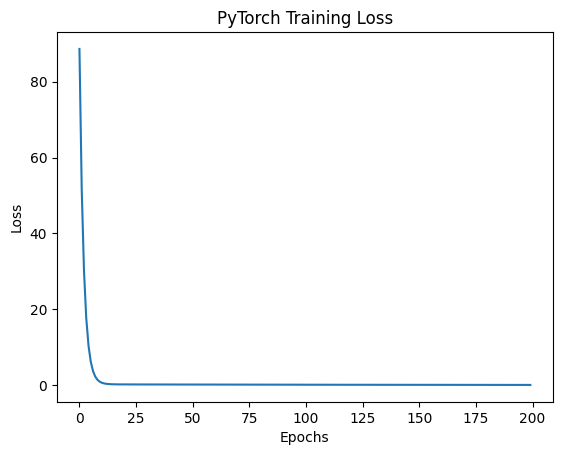

In [37]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("PyTorch Training Loss")
plt.show()

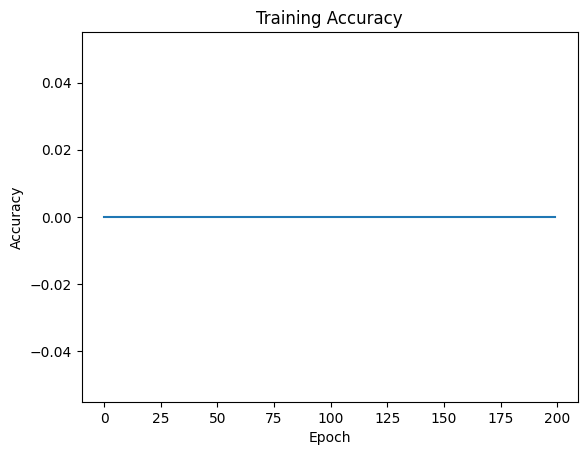

In [38]:
plt.plot(history.history['accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.show()


In [39]:
print(model(torch.tensor([[10.0]])))

tensor([[19.0273]], grad_fn=<AddmmBackward0>)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


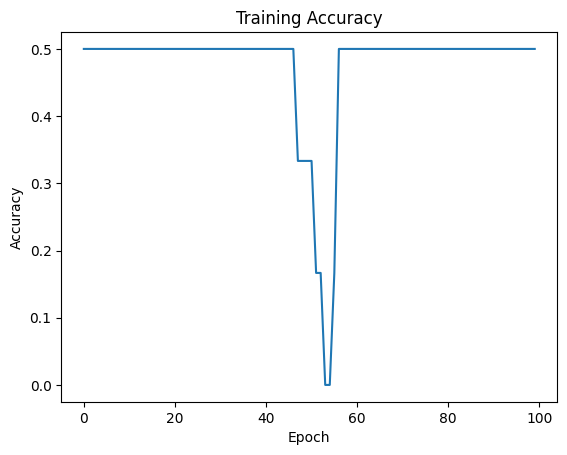

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Data (classification)
x = np.array([1,2,3,6,7,8], dtype=float)
y = np.array([0,0,0,1,1,1], dtype=float)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=[1])
])

# Compile (IMPORTANT)
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    x, y,
    epochs=100,
    verbose=0
)

# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.show()